C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:54: MatplotlibDeprecationWarning: Unrecognized location ' best'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.


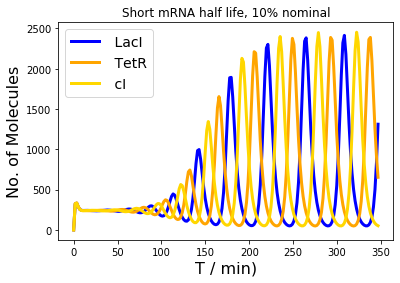

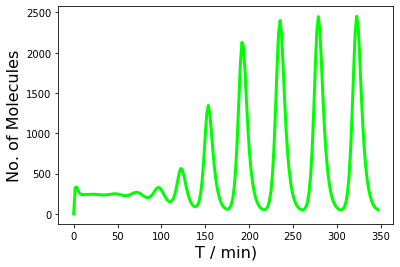

In [35]:
# ODE describing mRNA production
# p = protein conc, m = mrna conc, B = protein decay rate overmRNA decay; n = hill coeffcicient; a = no. of proteins produced from a promoter, a_init = from that promoter at full repression
# L= lacI con, L0 = LacI init; T = tetr initial conc, T0 = tetr init conc; C = lCi conc, C0 = lci initial; p = prot, m = mrna
#k = IPTG dissociation constant
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

a = 216
a_init = 0.2 
B = 2/10
n = 2
s = np.linspace(0,1000*(np.log(2)/2), 200)
k = 1e-6
IPTG = .1e-7
nI = 1


def dspec(x, t):
   
    mL = x[0]
    pL = x[1]
    mT = x[2]
    pT = x[3]
    mC = x[4]
    pC = x[5]

    dmL = a/(1 + pC**n) + a_init - mL
    dpL    = - B* (pL - mL ) * (1- IPTG**nI/(k**nI + IPTG**nI))
    
    #TetR 

    dmT = a/(1 + pL**n) + a_init - mT
    dpT    = - B* (pT- mT) #

    #CI
  
    dmC   = a/(1+(pT)**n)+ a_init - mC
    dpC      = - B* (pC - mC)
    
    
    return[dmL,dpL,dmT,dpT,dmC,dpC]

    
    

X0 = [0, 0 ,0 , 0, 0, 0]

c = odeint(dspec, X0, s)

plt.plot(s,c[:,1]*40,label = " LacI", color="blue", lw=3)
plt.plot(s,c[:,3]*40,label = " TetR", color="orange", lw=3)
plt.plot(s,c[:,5]*40,label = " cI", color="gold", lw=3)
plt.legend(fontsize=14, loc=" best")
plt.title('Short mRNA half life, 10% nominal')

plt.xlabel("T / min)", fontsize=16)
plt.ylabel("No. of Molecules", fontsize=16)
plt.show()


plt.plot(s,c[:,5]*40,label = " GFP", color="lime", lw=3)
plt.xlabel("T / min)", fontsize=16)
plt.ylabel("No. of Molecules", fontsize=16)
plt.title('')
plt.show()